In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

# Data

In [2]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                        cov=0.1,
                        n_samples=N,
                        n_features=2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None)

In [3]:
X, y = gaussian_quantiles

In [6]:
y = y[:, np.newaxis]

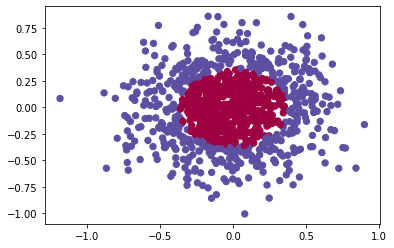

In [7]:
plt.scatter(X[:,0], X[:,1], c=y[:,0], s=40, cmap=plt.cm.Spectral)

# Activation Function

In [8]:
def sigmoid(x, derivate=False):
  if derivate:
    return np.exp(-x)/((np.exp(-x)+1)**2)
  else:
    return 1/(1+np.exp(-x))

def relu(x, derivate=False):
  if derivate:
    x[x<=0] = 0
    x[x>0] = 1
    return x
  else:
    return np.maximum(0,x)

# Loss Function

In [9]:
def mse(y, y_hat, derivate=False):
  if derivate:
    return(y_hat-y)
  else:
    return np.mean((y_hat-y)**2)

# Neural Network architecture

In [10]:
def initialize_parameters_deep(layers_dim):
  parameters = {}
  L = len(layers_dim)
  for l in range(0,L-1):
    parameters['W'+str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1])*2)-1
    parameters['b'+str(l+1)] = (np.random.rand(1,layers_dim[l+1])*2)-1
  return parameters

In [11]:
layer_dims = [2, 4, 8, 1]
params = initialize_parameters_deep(layer_dims)

In [12]:
params

{'W1': array([[ 0.62313508, -0.49984498,  0.6471125 , -0.36852418],
        [-0.77768841, -0.07079014,  0.83250383,  0.82782849]]),
 'W2': array([[ 0.98018691,  0.3494188 , -0.17784448,  0.39511922,  0.77407917,
          0.3456798 , -0.61451447,  0.25868247],
        [ 0.450178  ,  0.70659799, -0.05193242, -0.37995883, -0.92810469,
         -0.99876088, -0.99494588,  0.11558665],
        [-0.53920748,  0.84309025,  0.03219215,  0.53313732,  0.16006759,
         -0.81317559, -0.61928886, -0.61897204],
        [ 0.87213716, -0.14409916, -0.02397359,  0.59131578,  0.560418  ,
          0.04134304, -0.89823862,  0.25513043]]),
 'W3': array([[-0.20099534],
        [ 0.23737761],
        [-0.4544125 ],
        [ 0.97814819],
        [ 0.10460137],
        [-0.17544864],
        [ 0.18509415],
        [ 0.86467198]]),
 'b1': array([[-0.10795633, -0.90023812, -0.54886441,  0.08837443]]),
 'b2': array([[ 0.03863619,  0.44853158, -0.46436292,  0.33300221, -0.40301443,
          0.12386961,  0.5

# Forward

In [17]:
params['A0'] = X

params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
params['A1'] = relu(params['Z1'])

params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
params['A2'] = relu(params['Z2'])

params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
params['A3'] = sigmoid(params['Z3'])

output = params['A3']

# Backpropagation

In [19]:
params['dZ3'] = mse(y, output, True) * sigmoid(params['A3'], True)
params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'], True)
params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['A1'], True)
params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])

# Gradient Descent

In [20]:
lr = 0.0001

params['W3'] = params['W3'] - params['dW3'] * lr
params['b3'] = params['b3'] - np.mean(params['dW3'], axis=0, keepdims=True) * lr

params['W2'] = params['W2'] - params['dW2'] * lr
params['b2'] = params['b2'] - np.mean(params['dW2'], axis=0, keepdims=True) * lr

params['W1'] = params['W1'] - params['dW1'] * lr
params['b1'] = params['b1'] - np.mean(params['dW1'], axis=0, keepdims=True) * lr

# Training Function

In [21]:
def train(x_data, lr, params, training=True):
  #Forward
  params['A0'] = x_data

  params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
  params['A1'] = relu(params['Z1'])

  params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
  params['A2'] = relu(params['Z2'])

  params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
  params['A3'] = sigmoid(params['Z3'])

  output = params['A3']

  if training:
  #Backpropagation
    params['dZ3'] = mse(y, output, True) * sigmoid(params['A3'], True)
    params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

    params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'], True)
    params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

    params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['A1'], True)
    params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])

    #Gradient Descent
    params['W3'] = params['W3'] - params['dW3'] * lr
    params['b3'] = params['b3'] - np.mean(params['dW3'], axis=0, keepdims=True) * lr

    params['W2'] = params['W2'] - params['dW2'] * lr
    params['b2'] = params['b2'] - np.mean(params['dW2'], axis=0, keepdims=True) * lr

    params['W1'] = params['W1'] - params['dW1'] * lr
    params['b1'] = params['b1'] - np.mean(params['dW1'], axis=0, keepdims=True) * lr

  return output

In [162]:
layer_dims = [2, 4, 8, 1]
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(110000):
  output = train(X, 0.000005, params)
  if _%25 == 0:
    errors.append(mse(y, output))

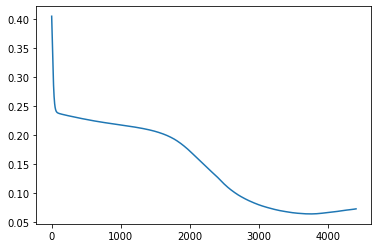

In [163]:
plt.plot(errors)

In [167]:
data_test = (np.random.rand(1000,2)*2)-1
y_test = train(data_test,0.000005, params, training=False)

In [168]:
y_test = np.where(y_test>=0.5, 1, 0)

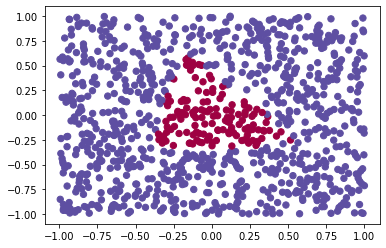

In [169]:
plt.scatter(data_test[:,0], data_test[:,1], c=y_test[:,0], s=40, cmap=plt.cm.Spectral)